In [22]:
import pandas as pd
import requests
import datetime
import seaborn as sns
import matplotlib as plt

In [4]:
with requests.get("https://raw.githubusercontent.com/pesikj/progr2-python/master/data/air_polution_ukol.csv") as r:
  open("air_polution_ukol.csv", 'w', encoding="utf-8").write(r.text)

In [5]:
data = pd.read_csv("air_polution_ukol.csv")
data

,date,pm25
0,2021/9/1,34.0
1,2021/9/2,38.0
2,2021/9/3,44.0
3,2021/9/4,52.0
4,2021/9/5,59.0
...,...,...
2679,2015/3/30,NaN
2680,2015/3/31,NaN
2681,2014/6/24,NaN
2682,2014/6/25,NaN


In [9]:
#vytvoření sloupců s rokem a měsícem
data["date"] = pd.to_datetime(data["date"])
data["year"] = data["date"].dt.year
data["month"] = data["date"].dt.month
data

,date,pm25,year,month
0,2021-09-01,34.0,2021,9
1,2021-09-02,38.0,2021,9
2,2021-09-03,44.0,2021,9
3,2021-09-04,52.0,2021,9
4,2021-09-05,59.0,2021,9
...,...,...,...,...
2679,2015-03-30,NaN,2015,3
2680,2015-03-31,NaN,2015,3
2681,2014-06-24,NaN,2014,6
2682,2014-06-25,NaN,2014,6


In [10]:
#vytvoření kontingenční tabulky
pivot = pd.pivot_table(data, index=("year", "month"), values="pm25", aggfunc="mean")
pivot

pm25
year month           
2014 1      98.548387
     2      75.750000
     3      93.366667
     4      59.896552
     5      32.709677
...               ...
2021 5      22.935484
     6      43.700000
     7      32.290323
     8      26.096774
     9      43.962963

[91 rows x 1 columns]

<AxesSubplot:ylabel='year-month'>

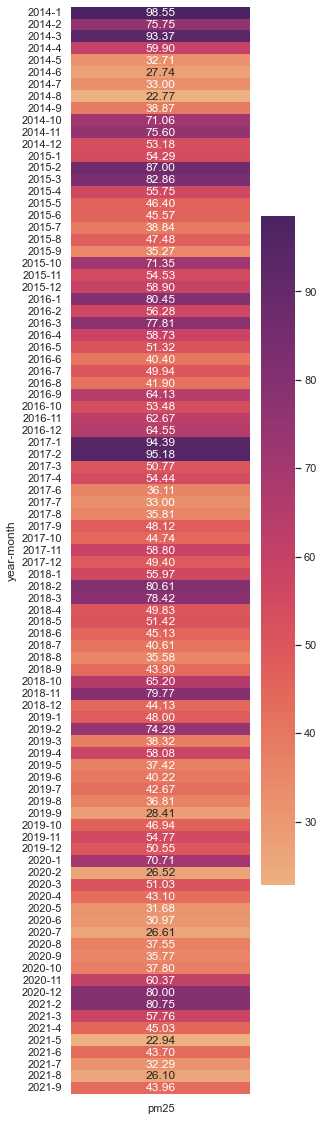

In [30]:
#zobrazení heatmapy, nastavení velikosti grafu
sns.set(rc={'figure.figsize':(4,20)})

sns.heatmap(pivot, annot=True, fmt=".2f", cmap="flare")


In [39]:
#vytvoření sloupce s dny v týdnu
day_of_week={0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
data["wk_name"] = data["date"].dt.dayofweek.map(day_of_week)
data["wk_num"] = data["date"].dt.dayofweek
data

,date,pm25,year,month,wk_day,wk_name,wk_num
0,2021-09-01,34.0,2021,9,Wednesday,Wednesday,2
1,2021-09-02,38.0,2021,9,Thursday,Thursday,3
2,2021-09-03,44.0,2021,9,Friday,Friday,4
3,2021-09-04,52.0,2021,9,Saturday,Saturday,5
4,2021-09-05,59.0,2021,9,Sunday,Sunday,6
...,...,...,...,...,...,...,...
2679,2015-03-30,NaN,2015,3,Monday,Monday,0
2680,2015-03-31,NaN,2015,3,Tuesday,Tuesday,1
2681,2014-06-24,NaN,2014,6,Tuesday,Tuesday,1
2682,2014-06-25,NaN,2014,6,Wednesday,Wednesday,2


In [40]:
#kontingenční tabulka pro dny v týdnu
pivot_dny = pd.pivot_table(data, index=("wk_num","wk_day"), values="pm25", aggfunc="mean")
pivot_dny

,,pm25
wk_num,wk_day,
0,Monday,49.556757
1,Tuesday,49.910326
2,Wednesday,51.663978
3,Thursday,53.178378
4,Friday,52.888889
5,Saturday,53.399464
6,Sunday,51.965054
